In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [17]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [20]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 117ms/step - loss: 1.4229 - accuracy: 0.5922 - val_loss: 1.1509 - val_accuracy: 0.5502
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6054 - accuracy: 0.6755 - val_loss: 0.5679 - val_accuracy: 0.7056
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5556 - accuracy: 0.7157 - val_loss: 0.8280 - val_accuracy: 0.6464
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4926 - accuracy: 0.7541 - val_loss: 0.5372 - val_accuracy: 0.7362
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4380 - accuracy: 0.7814 - val_loss: 0.4459 - val_accuracy: 0.8022
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3921 - accuracy: 0.8054 - val_loss: 0.5263 - val_accuracy: 0.7390
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3376 - accuracy: 0.8321 - val_loss: 0.4654 - val_ac

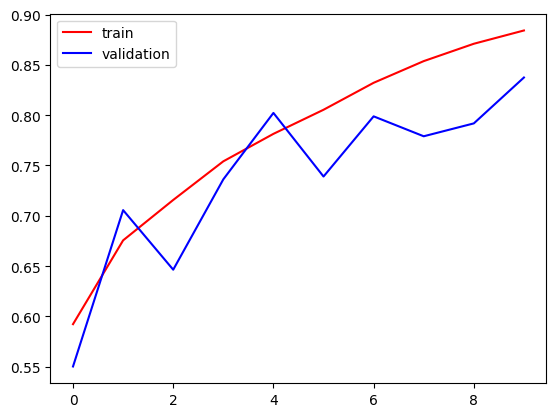

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

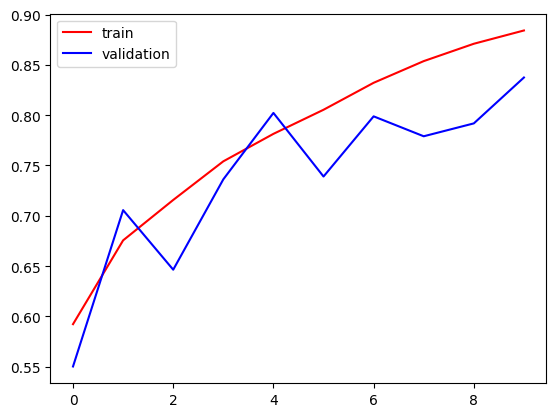

In [27]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



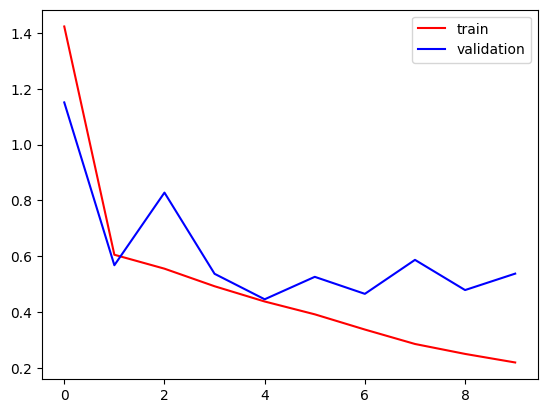

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

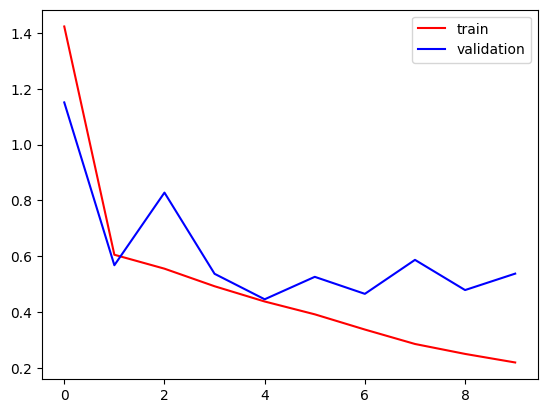

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
import cv2

In [39]:
cat_img = cv2.imread('/content/download.jpeg')

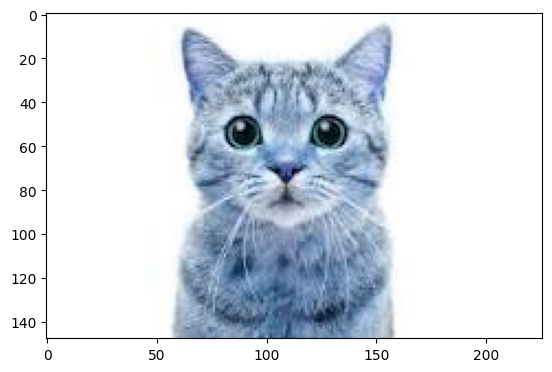

In [40]:
plt.imshow(cat_img)

In [42]:
cat_img.shape


(148, 226, 3)

In [47]:
cat_img = cv2.resize(cat_img,(256,256))

In [48]:
test_input = cat_img.reshape((1,256,256,3))

In [49]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [45]:
dog_img = cv2.imread('/content/download (2).jpeg')

In [46]:
dog_img.shape

(148, 228, 3)

In [52]:
dog_img = cv2.resize(dog_img,(256,256))

In [53]:
test_input = cat_img.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)